## Carga y Exploración de Datos

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Cargar datos
file_path = 'WineQT.csv'
wine_data = pd.read_csv(file_path)


In [4]:
# Revisión de estructura básica
print(wine_data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [5]:
# Describir las variables y su distribución.
print(wine_data.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000             1.000000         

In [6]:
# Verificar valores nulos
print(wine_data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


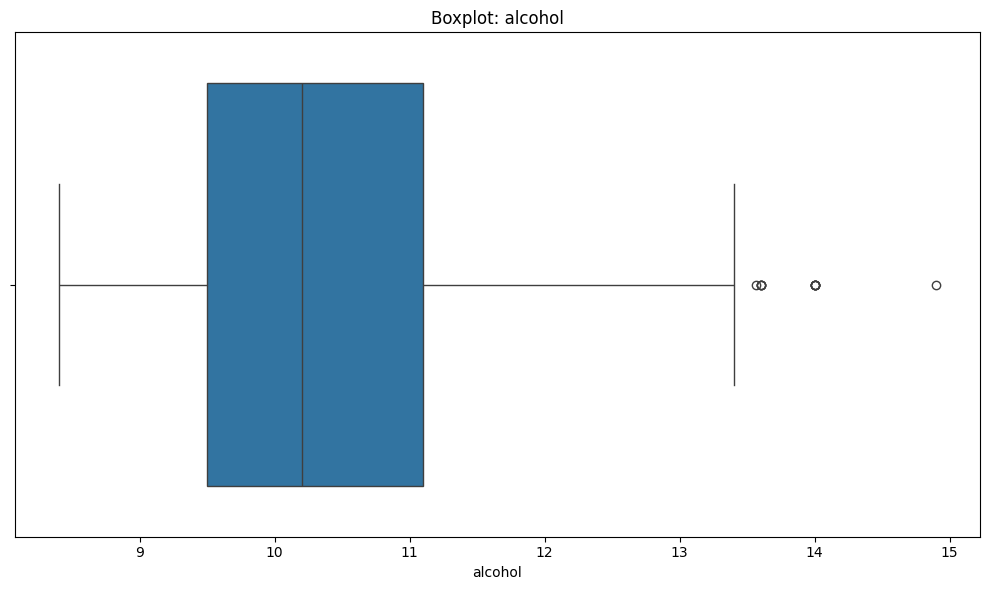

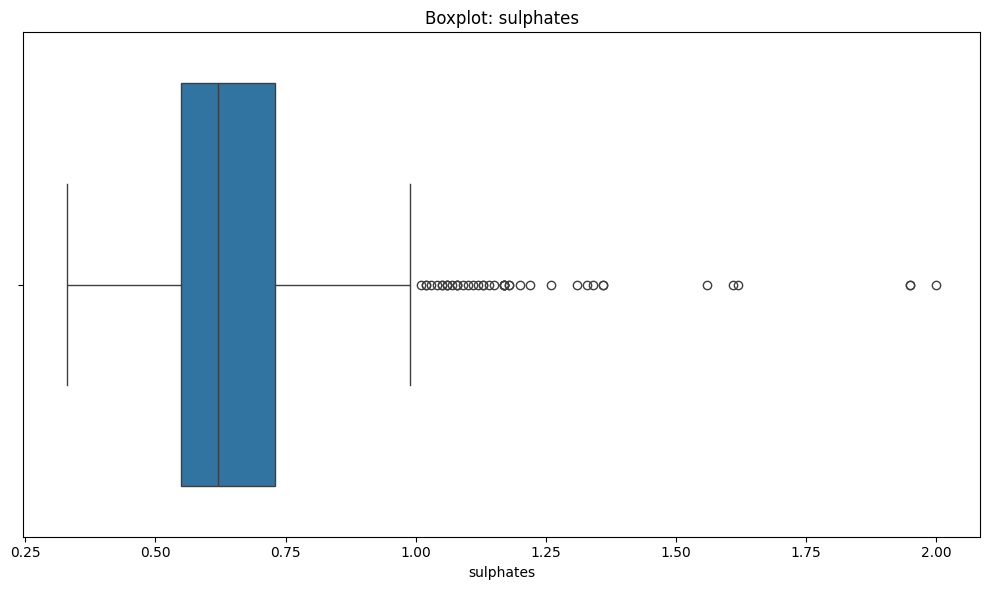

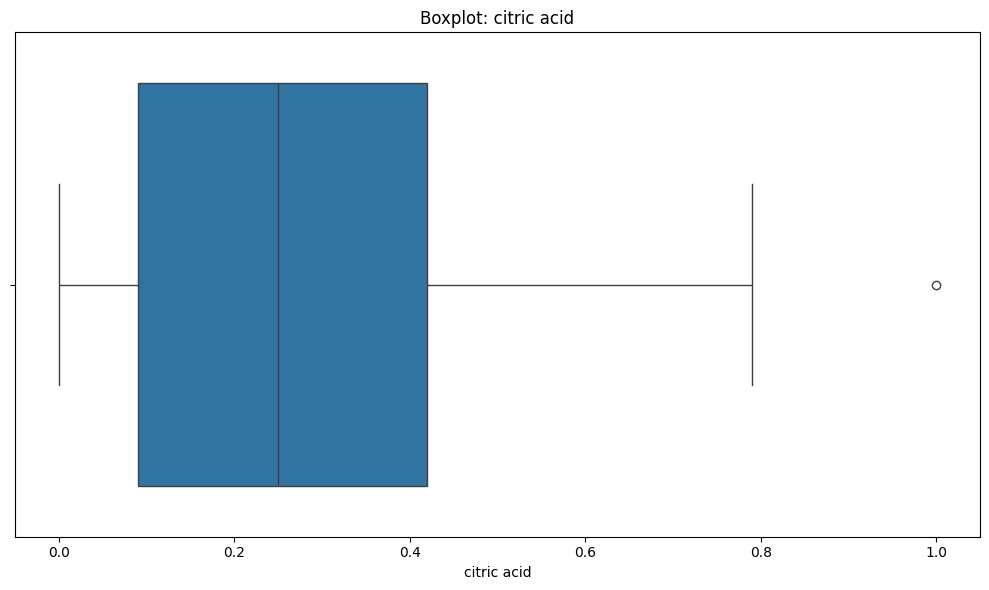

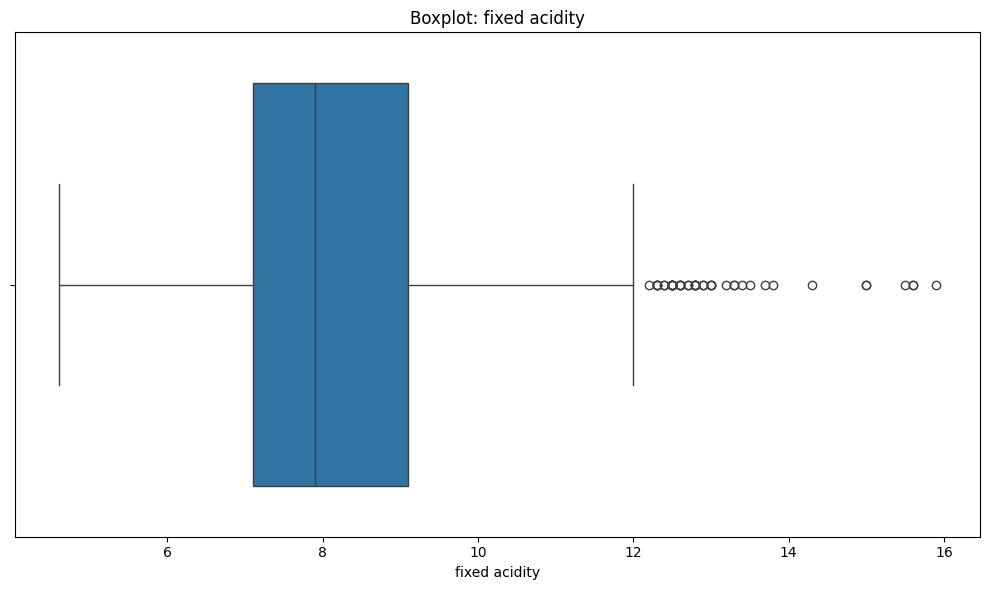

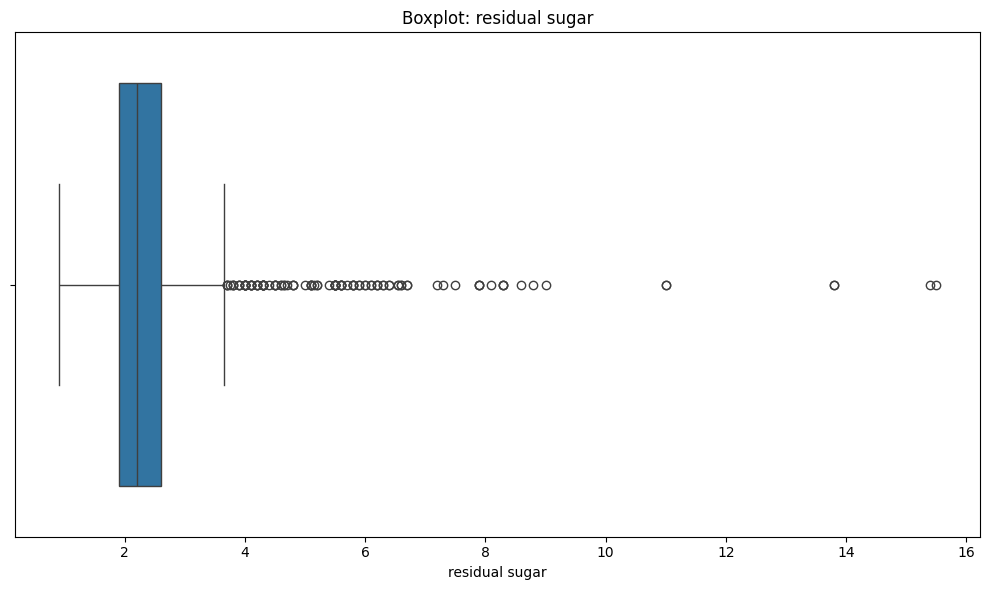

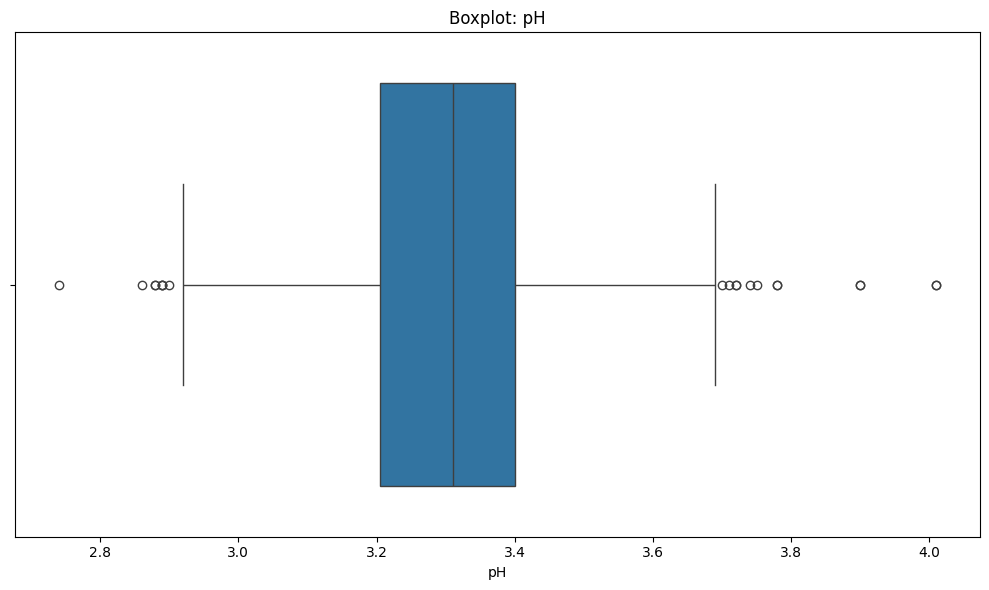

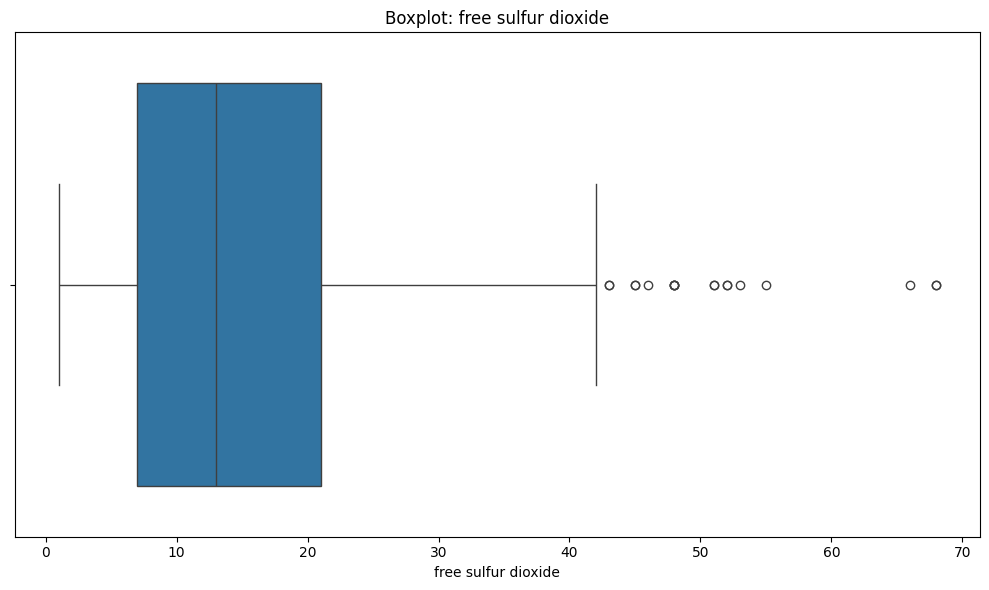

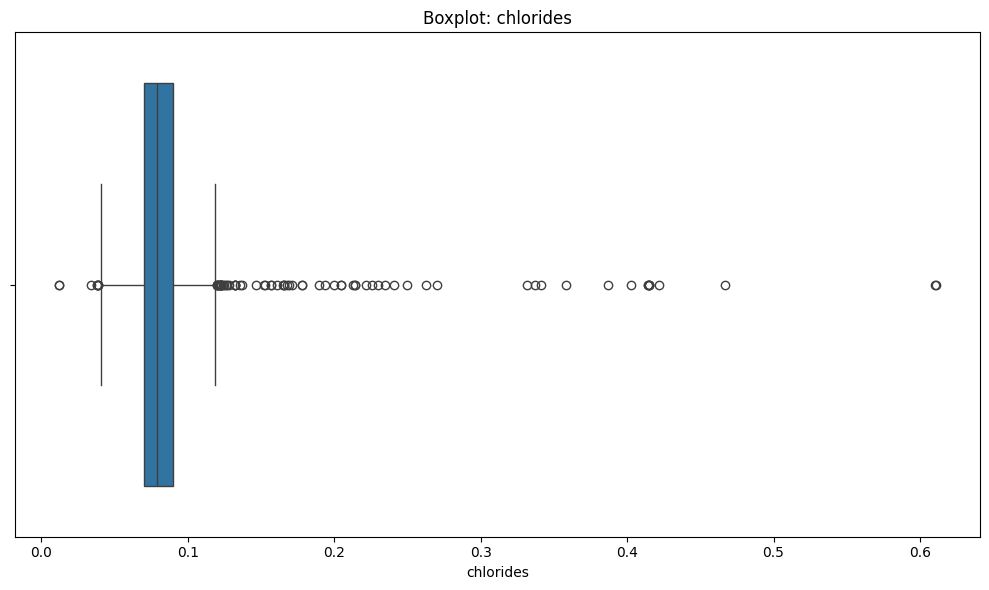

In [11]:
#Outliers
# Seleccionar las características para el análisis
selected_features = ['alcohol', 'sulphates', 'citric acid', 'fixed acidity',
                     'residual sugar', 'pH', 'free sulfur dioxide', 'chlorides']

# Análisis y gráficos de valores atípicos
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=wine_data, x=feature)
    plt.title(f'Boxplot: {feature}')
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()

# Conclusión general
La mayoría de las características contienen valores atípicos que se encuentran fuera de los límites del boxplot. Estos valores extremos pueden ser indicativos de datos anómalos o variaciones naturales en las muestras.

In [12]:
#Tratamiento de outliers
# Seleccionar las características para el análisis
selected_features = ['alcohol', 'sulphates', 'citric acid', 'fixed acidity',
                     'residual sugar', 'pH', 'free sulfur dioxide', 'chlorides']

# Análisis y tratamiento de outliers
def remove_outliers(df, features):
    """Eliminar outliers utilizando el rango intercuartílico (IQR)."""
    for feature in features:
        Q1 = df[feature].quantile(0.25)  # Primer cuartil
        Q3 = df[feature].quantile(0.75)  # Tercer cuartil
        IQR = Q3 - Q1  # Rango intercuartílico
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

# Remover outliers
print(f"Dimensiones antes del tratamiento: {wine_data.shape}")
wine_data_cleaned = remove_outliers(wine_data, selected_features)
print(f"Dimensiones después del tratamiento: {wine_data_cleaned.shape}")

Dimensiones antes del tratamiento: (1143, 13)
Dimensiones después del tratamiento: (854, 13)


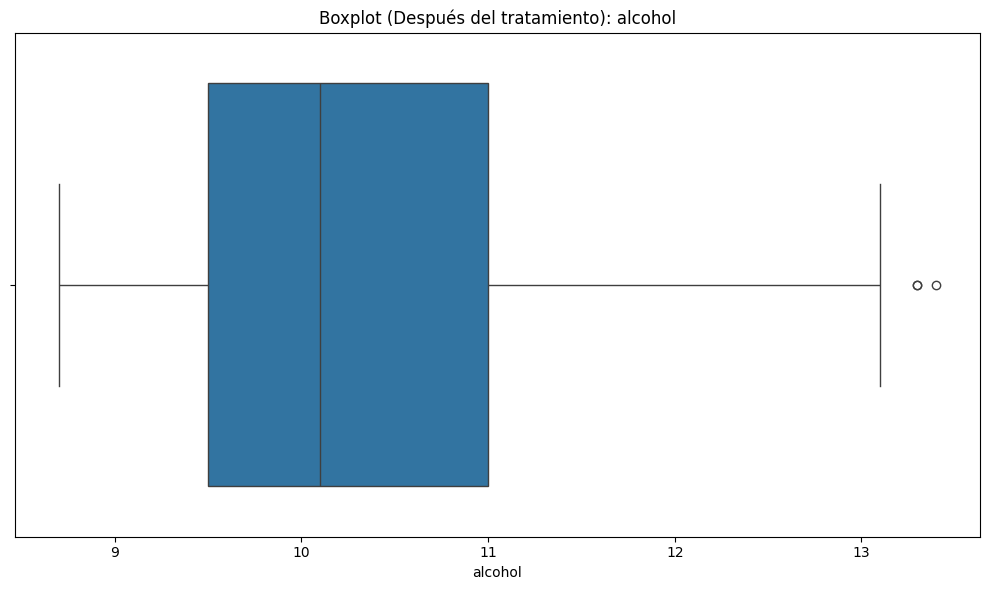

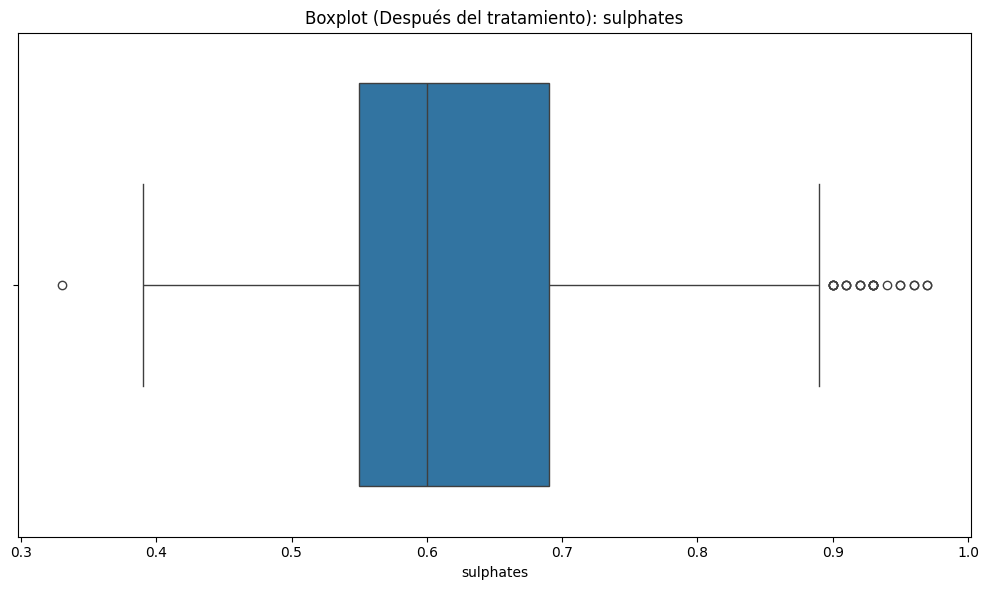

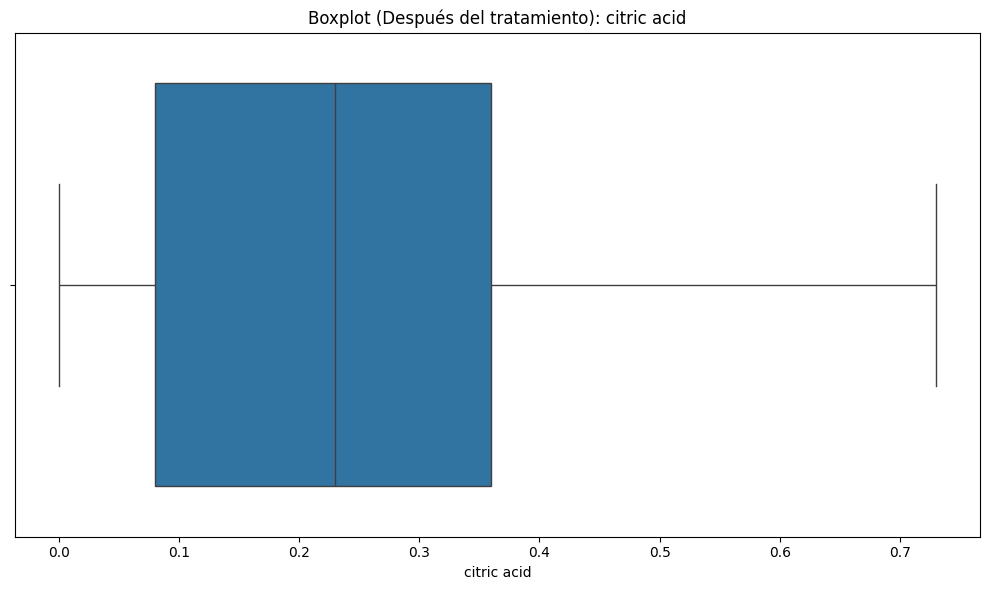

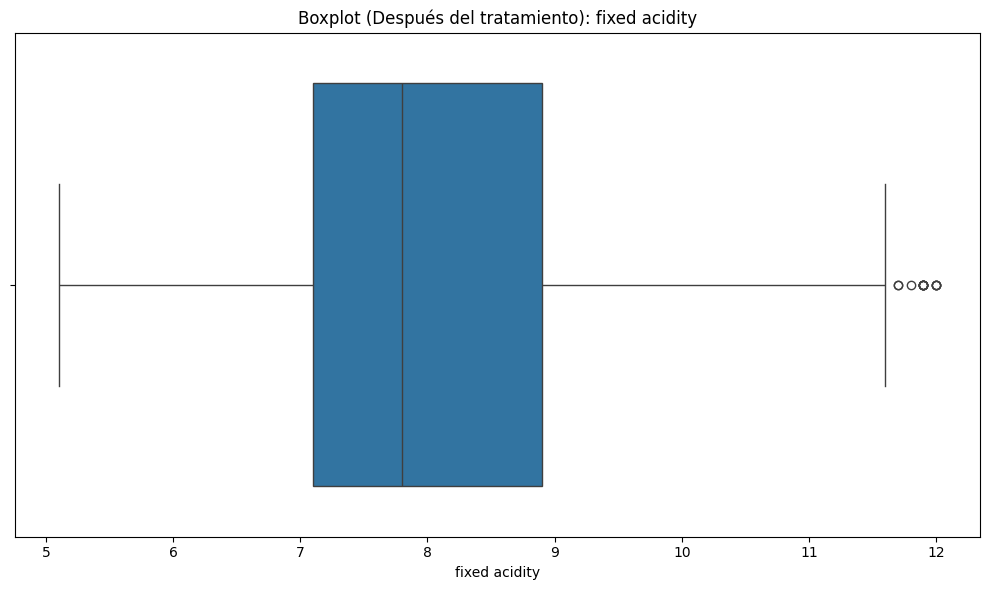

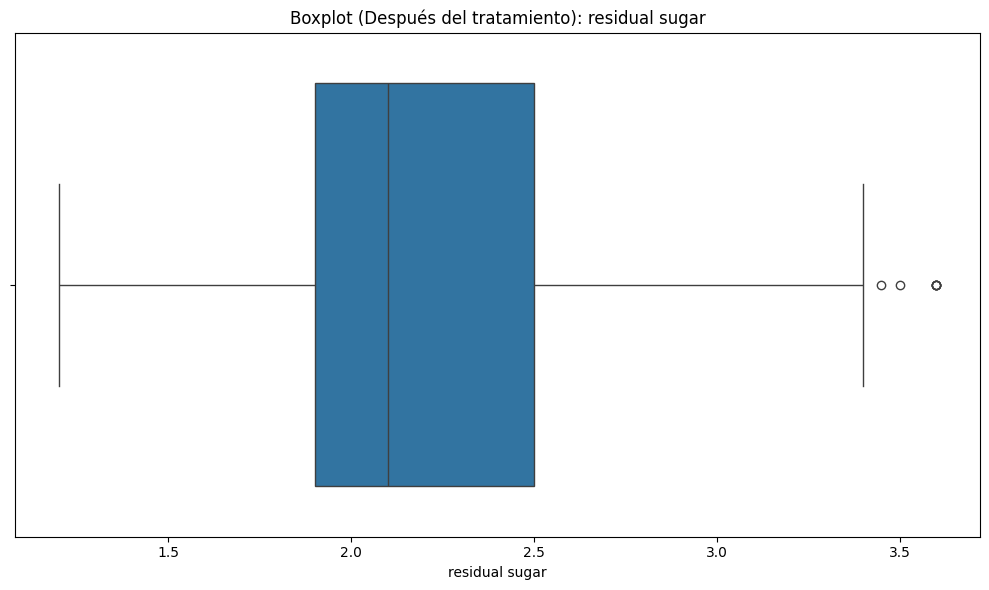

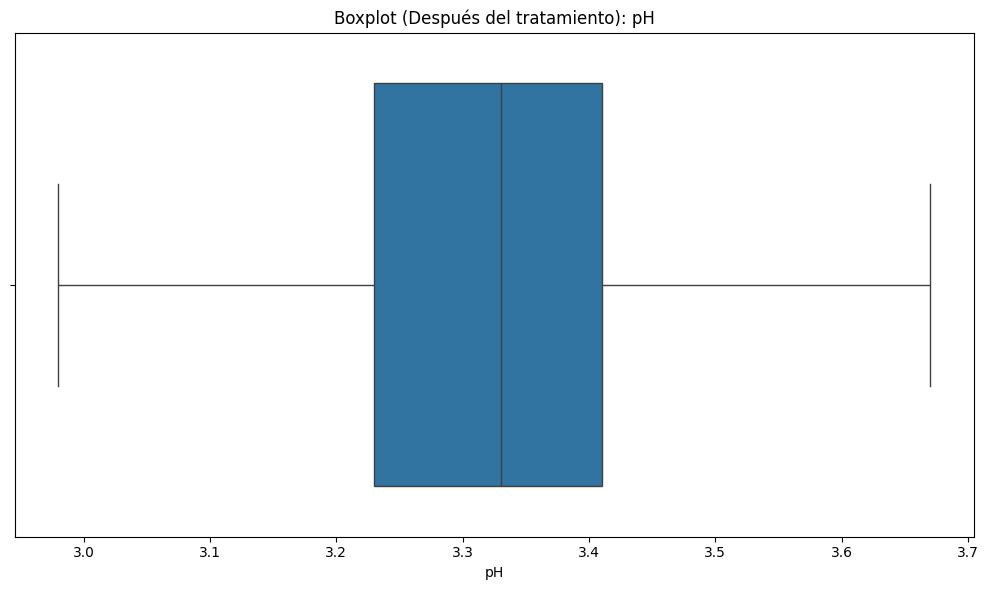

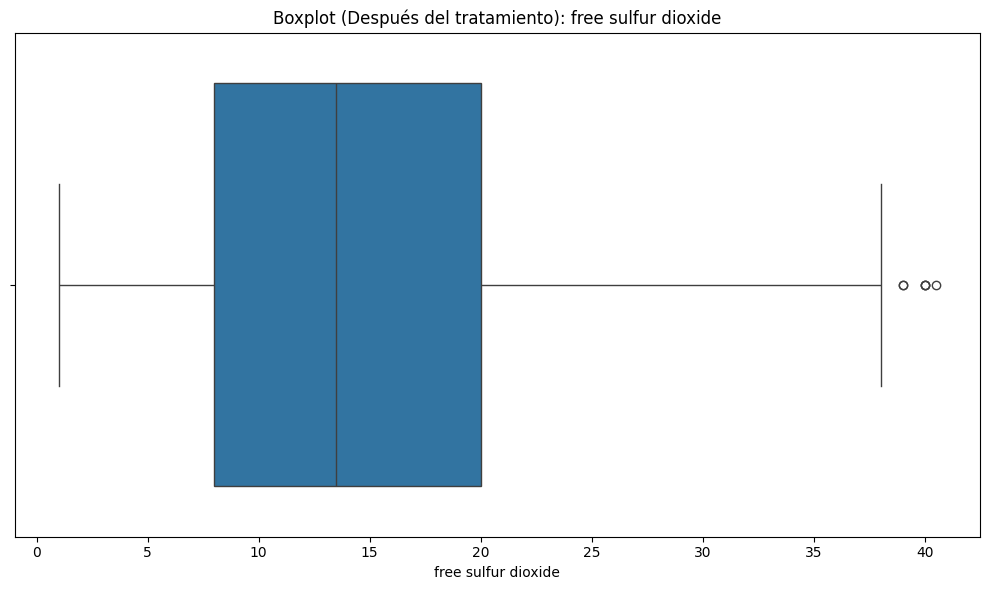

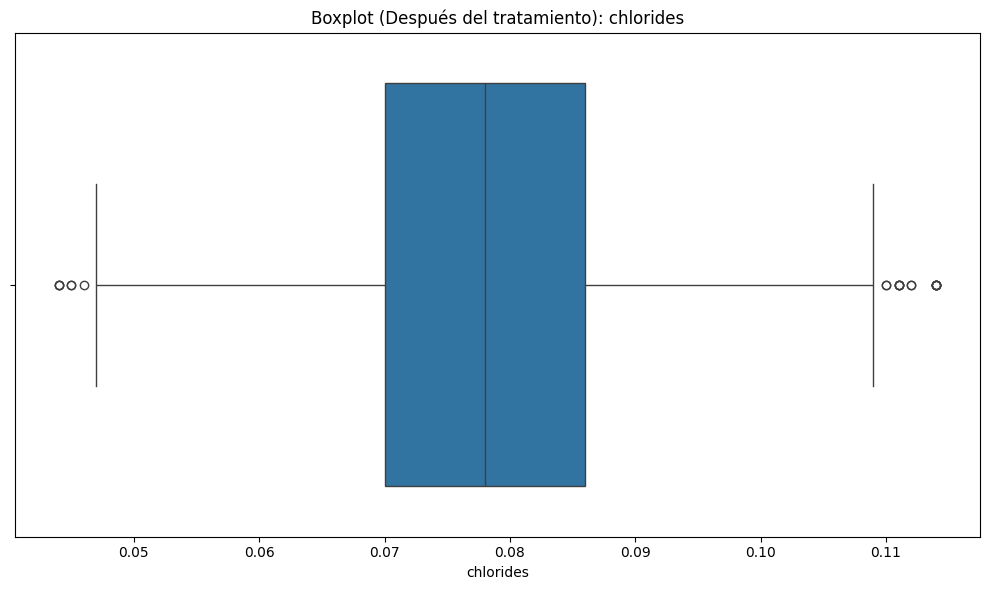

In [13]:
# Visualización de datos después del tratamiento
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=wine_data_cleaned, x=feature)
    plt.title(f'Boxplot (Después del tratamiento): {feature}')
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()



# Conclusión
El tratamiento de valores atípicos utilizando el rango intercuartílico (IQR) ha reducido el tamaño del dataset. Los valores fuera de los límites definidos por el IQR fueron eliminados.

## Preprocesamiento de Datos

In [15]:
# Selección de características y etiquetas
selected_features = ['alcohol', 'sulphates', 'citric acid', 'fixed acidity',
                     'residual sugar', 'pH', 'free sulfur dioxide', 'chlorides']
X = wine_data[selected_features]
y = wine_data['quality']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Entrenamiento de Modelos

In [17]:
# Modelos
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Entrenamiento
rf_model.fit(X_train_scaled, y_train)
knn_model.fit(X_train_scaled, y_train)
lr_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

## Evaluación de Modelos

In [18]:
# Evaluación
models = {'Random Forest': rf_model, 'KNN': knn_model, 'Logistic Regression': lr_model}
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

--- Random Forest ---
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.71      0.76      0.73        96
           6       0.64      0.67      0.65        99
           7       0.64      0.54      0.58        26
           8       0.00      0.00      0.00         2

    accuracy                           0.67       229
   macro avg       0.40      0.39      0.39       229
weighted avg       0.65      0.67      0.66       229

[[ 0  3  3  0  0]
 [ 1 73 21  1  0]
 [ 0 27 66  6  0]
 [ 0  0 12 14  0]
 [ 0  0  1  1  0]]
--- KNN ---
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.62      0.79      0.70        96
           6       0.60      0.51      0.55        99
           7       0.50      0.38      0.43        26
           8       0.00      0.00      0.00         2

    accuracy                           0.59       229
   mac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m



```
# Análisis de modelos
```


**Random Forest:**

1. Mejor rendimiento global con una precisión promedio ponderada de 64% y una exactitud de 66%.

**K-Nearest Neighbors (KNN):**

1. Menor rendimiento con una exactitud de 59% sin embargo mostro
un mejor F1-Score para la clase 5 (70%), pero un rendimiento más bajo en la clase 6.

**Regresión Logística:**

Este modelo tuvo la menor exactitud (59%) y una precisión promedio ponderada de 56%.


#Recomendaciones
1. Random Forest es el modelo más confiable y debe ser la primera opción para este problema. Su rendimiento general es superior.
2. KNN puede mejorar con una optimización de parámetros
3. Regresión Logística no es ideal para problemas multiclase con distribución desigual.

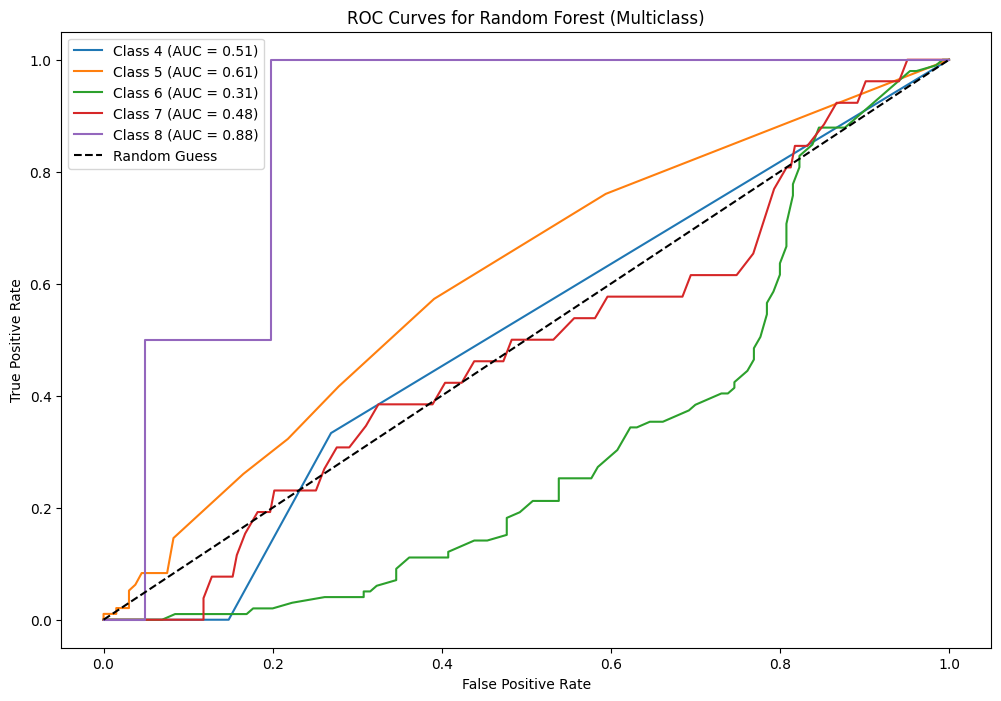

In [20]:
# Binarización de etiquetas
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_prob_rf = rf_model.predict_proba(X_test_scaled)

# Curvas ROC y AUC
plt.figure(figsize=(12, 8))
for i, label in enumerate(np.unique(y_test)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob_rf[:, i])
    plt.plot(fpr, tpr, label=f"Class {label} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.title("ROC Curves for Random Forest (Multiclass)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

#Rendimiento Variado por Clase

1. **Clase 5 y Clase 8:** Las clases con los mejores valores AUC, siendo 0.61 y 0.88 respectivamente, lo que indica que el modelo tiene un buen rendimiento para distinguir estas clases de las demás.
2. **Clase 6:** Tiene el peor valor AUC (0.31)
3. **Clase 4 y Clase 7: **Valores AUC moderados (0.51 y 0.48),rendimiento aceptable pero con margen de mejora.

Las clases con menor representación (por ejemplo, Clase 8) suelen tener mejores valores AUC debido a la mayor facilidad del modelo para identificar extremos, aunque esto no siempre significa un buen rendimiento general.
